# Our first machine learning model: Logistic Regression

In [1]:
# Import our libraries
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix as pltcm
# from sklearn.metrics import classification_report

# from textwrap import fill

# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [2]:
# Load the titanic data set into a pandas dataframe.
titanic_df = pd.read_csv('data/titanic.csv', index_col= 0)

titanic_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [3]:
# Identify which columns have null values. 
titanic_df.info()
titanic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [4]:
# Check to see if our data has any duplicate rows.
# titanic_df.duplicated().sum()
titanic_df.duplicated().unique()

array([False])

# Use sns.pariplot to visualize.
* Set the hue='survived'.

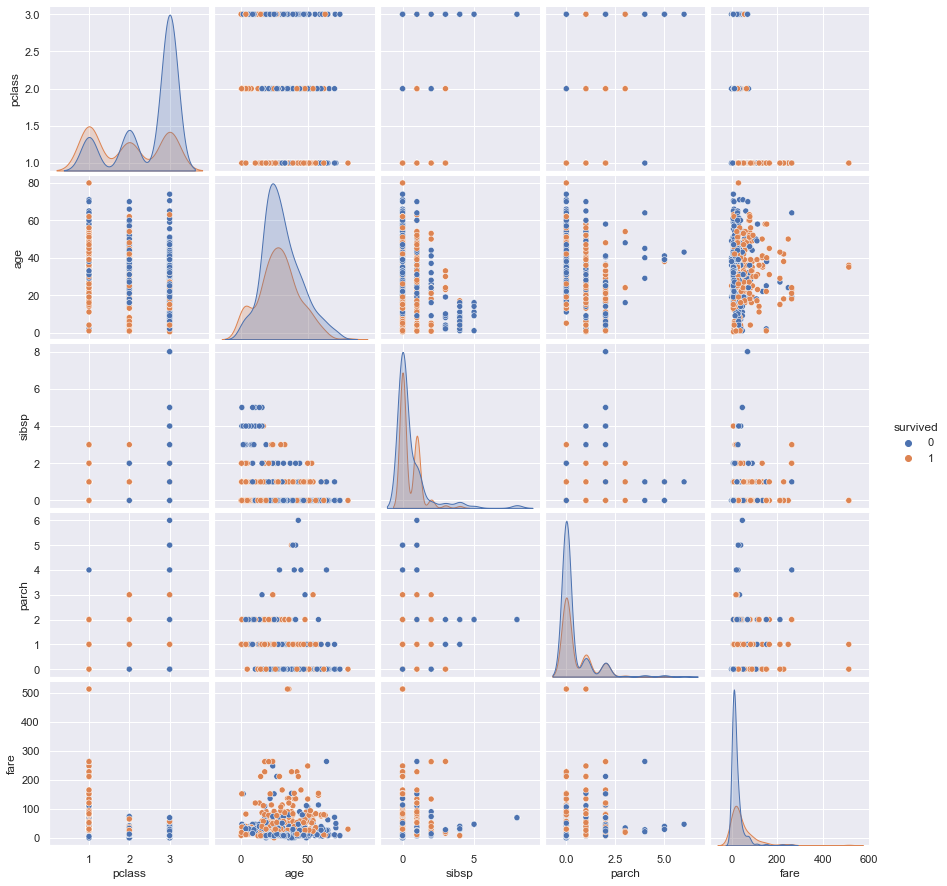

In [5]:
# Use sns.pariplot to visualize.
ax = sns.pairplot(titanic_df, hue= 'survived')

# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [6]:
# Convert the sex column into a continuous variable by using pd.get_dummies
titanic_df = pd.get_dummies(titanic_df, columns= ['sex'], drop_first= True, dtype= np.int64)

# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [7]:
# Select our features
selected_features = ['fare', 'sex_male']

# Set X to be the features we are going to use.
X = titanic_df[selected_features]

# Set y to be our target variable. 
y = titanic_df['survived']

# Split our data into the testing and training groups. 

In [8]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state= 45)

# Print the length and width of our testing data.
print('Training Data Length:', X_train.shape[0], '\nTesting data length:', X_test.shape[0])

Training Data Length: (668, 2) 
Testing data length: (223, 2)


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [9]:
# Initalize our model
model = LogisticRegression()

# Train our model using our training data.

model.fit(X_train, y_train)

LogisticRegression()

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [10]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = model.predict(X_test)

In [11]:
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# Calculate our accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test, y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

# print(classification_report(y_test, y_pred))

Accuracy Score: 0.811659
Precision Score: 0.719512
Recall Score: 0.756410
F1 Score 0.737500


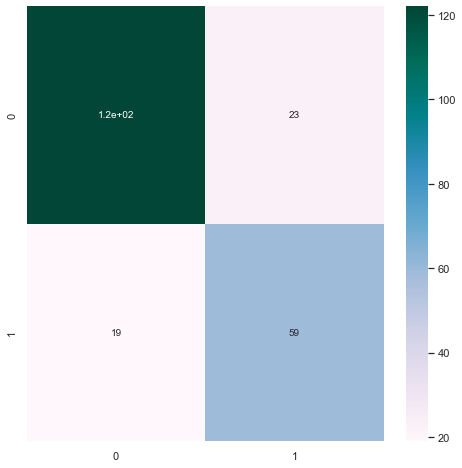

In [12]:
# 1. Plot a confusion matrix of your predicted results.  
fig = plt.figure(figsize=(8,8))


cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Heatmap of cm
ax = sns.heatmap(cm, annot=True, cmap= 'PuBuGn')

plt.xlabel('Predicted')
plt.ylabel('Actual')

In [13]:
# How many True Positives and True Negatives did your model get?
tn, fp, fn, tp = cm.ravel()
print(f'{tn} True Negatives and {tp} True Positives')

122 True Negatives and 59 True Positives


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

In [14]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on pclass and embarked of your DataFrame.
df = pd.get_dummies(df, columns= ['sex', 'pclass', 'embarked'], drop_first= True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   name         891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   ticket       891 non-null    object 
 7   fare         891 non-null    float64
 8   cabin        204 non-null    object 
 9   sex_male     891 non-null    uint8  
 10  pclass_2     891 non-null    uint8  
 11  pclass_3     891 non-null    uint8  
 12  embarked_Q   891 non-null    uint8  
 13  embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(5)
memory usage: 67.1+ KB


In [16]:

# Update your `selected_features` to include the new pclass and embarked features. 
selected_features2 = ['fare', 'sex_male', 'pclass_2', 'pclass_3', 'embarked_Q', 'embarked_S', 'sibsp', 'parch']

In [17]:
print(selected_features2)

['fare', 'sex_male', 'pclass_2', 'pclass_3', 'embarked_Q', 'embarked_S', 'sibsp', 'parch']


In [18]:

# Define your X and y variables
X2 = df[selected_features2]
y2 = df['survived']

# Split our data into testing and training.
# !!! Remeber to use the same random state as you used before
X_train2, X_test2,y_train2, y_test2 = train_test_split(X2, y2, test_size= .25, random_state= 45)


In [19]:

# Initalize our model_2
model_2 = LogisticRegression()

# Fit / Train our model using our training data.
model_2.fit(X_train2, y_train2)

# Make new predicitions using our testing data. 
y_pred2 = model_2.predict(X_test2)


C:\Users\jetbu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:

# Calculate our accuracy
accuracy_2 = accuracy_score(y_test2, y_pred2)

# Calculate our precision score
precision_2 = precision_score(y_test2, y_pred2)

# Calculate our recall score
recall_2 = recall_score(y_test2, y_pred2)

# Calculate your f1-score
f1_2 = f1_score(y_test2, y_pred2)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)


Accuracy Score: 0.829596
Precision Score: 0.756410
Recall Score: 0.756410
F1 Score 0.756410


Text(48.5, 0.5, 'Actual')

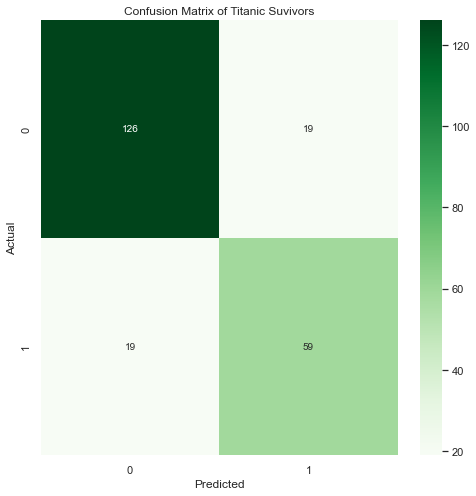

In [21]:
cm = confusion_matrix(y_test2, y_pred2).round(2)

fig = plt.figure(figsize=(8,8))
ax2 = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Titanic Suvivors")
plt.xlabel('Predicted')
plt.ylabel('Actual')

# EXTRA CREDIT
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

In [22]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.
df = pd.get_dummies(df, columns= ['sex', 'pclass', 'embarked'], drop_first= True)

# Fill null age values with mean age.
df.age.fillna(df['age'].mean(), inplace= True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   name         891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   ticket       891 non-null    object 
 7   fare         891 non-null    float64
 8   cabin        204 non-null    object 
 9   sex_male     891 non-null    uint8  
 10  pclass_2     891 non-null    uint8  
 11  pclass_3     891 non-null    uint8  
 12  embarked_Q   891 non-null    uint8  
 13  embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(5)
memory usage: 67.1+ KB


In [24]:
# Create new traveled_alone feature

cond = (df['sibsp'] == 0) | (df['parch'] == 0)

df['traveled_alone'] = np.where(cond, 1, 0)

In [25]:
# Update your `selected_features` to include the new traveled alone and age

selected_features3 = ['fare', 'sex_male', 'pclass_2', 'pclass_3', 'embarked_Q', 'embarked_S', 'age', 'traveled_alone']

Accuracy Score: 0.826816
Precision Score: 0.738462
Recall Score: 0.774194
F1 Score 0.755906


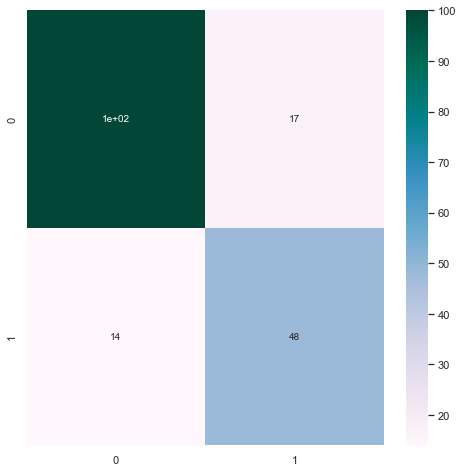

In [26]:

# Define your X and y variables
X3 = df[selected_features3]
y3 = df['survived']

# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.
model_3.fit(X_train, y_train)

# Make new predicitions using our testing data. 

y_pred3 = model_3.predict(X_test)
# Calculate our accuracy
accuracy_3 = accuracy_score(y_test, y_pred3)

# Calculate our precision score
precision_3 = precision_score(y_test, y_pred3)

# Calculate our recall score
recall_3 = recall_score(y_test, y_pred3)

# Calculate your f1-score
f1_3 = f1_score(y_test, y_pred3)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
plt.xlabel('Predicted')
plt.ylabel('Actual')

cm = confusion_matrix(y_test, y_pred3).round(2)

ax3 = sns.heatmap(cm, annot=True, cmap= 'PuBuGn')

In [27]:
def model_report(a,p,r,f):
    print("Accuracy Score: {:.4f}\nPrecision Score: {:.4f}\nRecall Score: {:.4f}\nF1 Score {:.4f}".format(a, p, r, f))

In [28]:
print('Model 1:')
model_report(accuracy, precision, recall, f1)

print('\nModel 2:')
model_report(accuracy_2, precision_2, recall_2, f1_2)

print('\nModel 3:')
model_report(accuracy_3, precision_3, recall_3, f1_3)

Model 1:
Accuracy Score: 0.8117
Precision Score: 0.7195
Recall Score: 0.7564
F1 Score 0.7375

Model 2:
Accuracy Score: 0.8296
Precision Score: 0.7564
Recall Score: 0.7564
F1 Score 0.7564

Model 3:
Accuracy Score: 0.8268
Precision Score: 0.7385
Recall Score: 0.7742
F1 Score 0.7559
